In [13]:
#Script to automatically take data from a crypto API
#API: Aplication Program Interface, it basically acts as an intermediary between two different 
#aplications that want to talk to each other.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video


In [14]:
type(data)

dict

In [15]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [16]:
#This normalizes the data and makes it all pretty in a dataframe
#We want to automate the data collection process so that we can just have the data ready to use
#First thing we want to do is to add a new column with the  timestamp

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\elanm\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9924,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.925805e+07,1.925805e+07,NaN,1,NaN,NaN,None,2023-01-10T14:38:00.000Z,17297.327181,1.588121e+10,-0.1679,0.351751,0.351639,3.296582,0.854428,4.290652,-9.440752,3.331128e+11,39.0232,3.632439e+11,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951
1,1027,Ethereum,ETH,ethereum,6342,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-01-10T14:38:00.000Z,1334.121835,6.058316e+09,-15.4708,0.568987,0.930742,9.603211,4.912087,9.536838,2.908268,1.632616e+11,19.1180,1.632616e+11,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951
2,825,Tether,USDT,tether,45969,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.627249e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.999975,2.595380e+10,-3.6837,0.002593,-0.000721,0.019446,-0.010305,0.152665,-0.001577,6.627085e+10,7.7604,7.313996e+10,None,2023-01-10T14:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-10 14:40:17.672951
3,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599630e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-01-10T14:38:00.000Z,275.797632,5.685627e+08,-30.0943,0.535144,-1.127617,12.145217,-4.686422,-2.797094,1.991567,4.411742e+10,5.1662,5.515953e+10,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951
4,3408,USD Coin,USDC,usd-coin,9459,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.393013e+10,4.393013e+10,NaN,5,NaN,NaN,None,2023-01-10T14:38:00.000Z,1.000092,2.690771e+09,-18.7379,0.023212,0.007332,0.003866,0.002512,-0.045012,0.018062,4.393418e+10,5.1447,4.393418e+10,None,2023-01-10T14:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-10 14:40:17.672951
5,52,XRP,XRP,xrp,874,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.062329e+10,9.998916e+10,NaN,6,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.349899,9.948924e+08,-15.4756,0.564831,-0.455353,0.956520,-9.583340,-5.869974,-28.413981,1.771303e+10,2.0742,3.498988e+10,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951
6,4687,Binance USD,BUSD,binance-usd,5977,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.634681e+10,1.634681e+10,NaN,7,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.999980,6.260906e+09,3.0142,-0.002308,-0.053987,-0.012040,0.038432,-0.158140,0.029377,1.634649e+10,1.9142,1.634649e+10,None,2023-01-10T14:38:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-10 14:40:17.672951
7,2010,Cardano,ADA,cardano,634,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.452197e+10,3.528563e+10,NaN,8,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.318062,5.294852e+08,-39.6210,0.955652,-0.498377,24.857437,1.952429,-7.905436,-18.635988,1.098013e+10,1.2858,1.431279e+10,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951
8,74,Dogecoin,DOGE,dogecoin,631,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,None,2023

In [24]:
#We are going to create a script that is going to append data to this data frame right here

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

# Use this if you want to create a csv and append data to it
 
    if not os.path.isfile(r'C:\Users\elanm\API.csv'):
        df.to_csv(r'C:\Users\elanm\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\elanm\API.csv', mode='a', header=False)



In [25]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\elanm\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\elanm\AppData\Local\Temp\ipykernel_27448\347385325.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [26]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9924,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.925805e+07,1.925805e+07,NaN,1,NaN,NaN,None,2023-01-10T14:38:00.000Z,17297.327181,1.588121e+10,-0.1679,0.351751,0.351639,3.296582,0.854428,4.290652,-9.440752,3.331128e+11,39.0232,3.632439e+11,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951,NaT
1,1027,Ethereum,ETH,ethereum,6342,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-01-10T14:38:00.000Z,1334.121835,6.058316e+09,-15.4708,0.568987,0.930742,9.603211,4.912087,9.536838,2.908268,1.632616e+11,19.1180,1.632616e+11,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951,NaT
2,825,Tether,USDT,tether,45969,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.627249e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.999975,2.595380e+10,-3.6837,0.002593,-0.000721,0.019446,-0.010305,0.152665,-0.001577,6.627085e+10,7.7604,7.313996e+10,None,2023-01-10T14:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-10 14:40:17.672951,NaT
3,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599630e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-01-10T14:38:00.000Z,275.797632,5.685627e+08,-30.0943,0.535144,-1.127617,12.145217,-4.686422,-2.797094,1.991567,4.411742e+10,5.1662,5.515953e+10,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951,NaT
4,3408,USD Coin,USDC,usd-coin,9459,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.393013e+10,4.393013e+10,NaN,5,NaN,NaN,None,2023-01-10T14:38:00.000Z,1.000092,2.690771e+09,-18.7379,0.023212,0.007332,0.003866,0.002512,-0.045012,0.018062,4.393418e+10,5.1447,4.393418e+10,None,2023-01-10T14:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-10 14:40:17.672951,NaT
5,52,XRP,XRP,xrp,874,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.062329e+10,9.998916e+10,NaN,6,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.349899,9.948924e+08,-15.4756,0.564831,-0.455353,0.956520,-9.583340,-5.869974,-28.413981,1.771303e+10,2.0742,3.498988e+10,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951,NaT
6,4687,Binance USD,BUSD,binance-usd,5977,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.634681e+10,1.634681e+10,NaN,7,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.999980,6.260906e+09,3.0142,-0.002308,-0.053987,-0.012040,0.038432,-0.158140,0.029377,1.634649e+10,1.9142,1.634649e+10,None,2023-01-10T14:38:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-10 14:40:17.672951,NaT
7,2010,Cardano,ADA,cardano,634,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.452197e+10,3.528563e+10,NaN,8,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.318062,5.294852e+08,-39.6210,0.955652,-0.498377,24.857437,1.952429,-7.905436,-18.635988,1.098013e+10,1.2858,1.431279e+10,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951,NaT
8,74,Dogecoin,DOGE,dogecoin,631,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.32670

In [27]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [28]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9924,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19258050.00000,19258050.00000,NaN,1,NaN,NaN,None,2023-01-10T14:38:00.000Z,17297.32718,15881214875.04042,-0.16790,0.35175,0.35164,3.29658,0.85443,4.29065,-9.44075,333112791710.35614,39.02320,363243870792.59998,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951,NaT
1,1027,Ethereum,ETH,ethereum,6342,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-01-10T14:38:00.000Z,1334.12184,6058316410.84064,-15.47080,0.56899,0.93074,9.60321,4.91209,9.53684,2.90827,163261646981.01639,19.11800,163261646981.01999,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951,NaT
2,825,Tether,USDT,tether,45969,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66272490385.11020,73141766321.23428,NaN,3,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.99998,25953799309.00969,-3.68370,0.00259,-0.00072,0.01945,-0.01031,0.15266,-0.00158,66270853238.20998,7.76040,73139959480.78999,None,2023-01-10T14:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-10 14:40:17.672951,NaT
3,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159963011.92137,159979963.59043,NaN,4,NaN,NaN,None,2023-01-10T14:38:00.000Z,275.79763,568562686.99615,-30.09430,0.53514,-1.12762,12.14522,-4.68642,-2.79709,1.99157,44117419972.19608,5.16620,55159526495.89000,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951,NaT
4,3408,USD Coin,USDC,usd-coin,9459,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43930125512.08440,43930125512.08440,NaN,5,NaN,NaN,None,2023-01-10T14:38:00.000Z,1.00009,2690770989.84540,-18.73790,0.02321,0.00733,0.00387,0.00251,-0.04501,0.01806,43934180889.57550,5.14470,43934180889.58000,None,2023-01-10T14:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-10 14:40:17.672951,NaT
5,52,XRP,XRP,xrp,874,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50623288122.00000,99989164463.00000,NaN,6,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.34990,994892449.76028,-15.47560,0.56483,-0.45535,0.95652,-9.58334,-5.86997,-28.41398,17713029517.26533,2.07420,34989883459.52000,None,2023-01-10T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-10 14:40:17.672951,NaT
6,4687,Binance USD,BUSD,binance-usd,5977,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,16346810879.40406,16346810879.40406,NaN,7,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.99998,6260905732.68303,3.01420,-0.00231,-0.05399,-0.01204,0.03843,-0.15814,0.02938,16346491406.37690,1.91420,16346491406.38000,None,2023-01-10T14:38:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-01-10 14:40:17.672951,NaT
7,2010,Cardano,ADA,cardano,634,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34521968146.01700,35285627462.32600,NaN,8,NaN,NaN,None,2023-01-10T14:38:00.000Z,0.31806,529485150.05435,-39.62100,0.95565,-0.49838,24.85744,1.95243,-7.90544,-18.63599,10980127871.22515,1.28580,14312792136.16000,None,2023-01-10T14:38:00.000Z,Na

In [29]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.28359,0.25024,3.23981,0.78395,3.49454,-9.48037
Ethereum,0.50672,0.80043,9.52676,4.82786,8.30875,2.85258
Tether,0.00123,-0.00081,0.01837,-0.01127,0.15415,-0.00389
BNB,0.45355,-1.30422,12.01853,-4.80725,-3.41785,1.88313
USD Coin,0.01113,-0.00518,-0.00356,-0.00699,-0.05487,0.00442
XRP,0.47460,-0.65393,0.87131,-9.66502,-6.49055,-28.46495
Binance USD,-0.00017,-0.04441,-0.01865,0.03817,-0.12510,0.01529
Cardano,0.82816,-0.73364,24.59657,1.74767,-8.65683,-18.76301
Dogecoin,0.80881,-0.99814,6.85014,-20.61450,-7.22012,28.19110


In [30]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     0.28359
           quote.USD.percent_change_24h    0.25024
           quote.USD.percent_change_7d     3.23981
           quote.USD.percent_change_30d    0.78395
           quote.USD.percent_change_60d    3.49454
                                            ...   
Shiba Inu  quote.USD.percent_change_24h    5.04625
           quote.USD.percent_change_7d    13.86426
           quote.USD.percent_change_30d    0.56646
           quote.USD.percent_change_60d   -3.55813
           quote.USD.percent_change_90d   -8.77643
Length: 90, dtype: float64

In [31]:
type(df4)

pandas.core.series.Series

In [32]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin   quote.USD.percent_change_1h   0.28359
          quote.USD.percent_change_24h  0.25024
          quote.USD.percent_change_7d   3.23981
          quote.USD.percent_change_30d  0.78395
          quote.USD.percent_change_60d  3.49454
...                                         ...
Shiba Inu quote.USD.percent_change_24h  5.04625
          quote.USD.percent_change_7d  13.86426
          quote.USD.percent_change_30d  0.56646
          quote.USD.percent_change_60d -3.55813
          quote.USD.percent_change_90d -8.77643

[90 rows x 1 columns]

In [33]:
df5.count()

values    90
dtype: int64

In [41]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6



,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.28359
1,Bitcoin,quote.USD.percent_change_24h,0.25024
2,Bitcoin,quote.USD.percent_change_7d,3.23981
3,Bitcoin,quote.USD.percent_change_30d,0.78395
4,Bitcoin,quote.USD.percent_change_60d,3.49454
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,5.04625
86,Shiba Inu,quote.USD.percent_change_7d,13.86426
87,Shiba Inu,quote.USD.percent_change_30d,0.56646
88,Shiba Inu,quote.USD.percent_change_60d,-3.55813


In [42]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.28359
1,Bitcoin,quote.USD.percent_change_24h,0.25024
2,Bitcoin,quote.USD.percent_change_7d,3.23981
3,Bitcoin,quote.USD.percent_change_30d,0.78395
4,Bitcoin,quote.USD.percent_change_60d,3.49454
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,5.04625
86,Shiba Inu,quote.USD.percent_change_7d,13.86426
87,Shiba Inu,quote.USD.percent_change_30d,0.56646
88,Shiba Inu,quote.USD.percent_change_60d,-3.55813


In [43]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.28359
1,Bitcoin,24h,0.25024
2,Bitcoin,7d,3.23981
3,Bitcoin,30d,0.78395
4,Bitcoin,60d,3.49454
...,...,...,...
85,Shiba Inu,24h,5.04625
86,Shiba Inu,7d,13.86426
87,Shiba Inu,30d,0.56646
88,Shiba Inu,60d,-3.55813


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

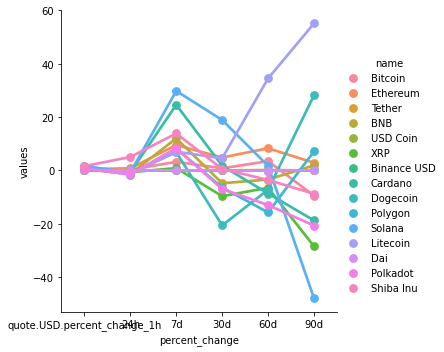

In [44]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')